<a href="https://colab.research.google.com/github/luisemiliotisocco/MEU-MC2/blob/main/TISOCCO-Luis_TF_MC2_UTDT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Metodos Cuantitativos Aplicados a Estudios Urbanos** \\
Alumno Luis Emilio Tisocco \\
luisemiliotisocco@gmail.com \\


---



Profesor Ricardo Pasquini \\
Universidad Torcuato Di Tella \\
rpasquini@gmail.com

En este trabajo final vamos a analizar si el gradiente de alquileres asociado a la teoria de la aglomeracion, ha cambiado a raiz del COVID. Analizaremos  ciudades seleccionadas de América Latina, utilizando datos de Properati. (https://www.properati.com.ar/data/). Cada grupo trabajara con una única ciudad.

**Importante:**


*   El trabajo se realiza en grupos de hasta 2 personas.
*   Las instrucciones para registrar su grupo y ciudad están en el sitio del campus UTDT de la materia. Deben buscar Trabajo Final.
*   La entrega se realiza **exclusivamente** mediante el Campus UTDT. 



# Preparacion del ambiente de trabajo y del geodataframe

In [ ]:
!pip install geopandas
!pip install contextily

     |████████████████████████████████| 994 kB 24.2 MB/s 
     |████████████████████████████████| 15.4 MB 34 kB/s 
     |████████████████████████████████| 6.6 MB 41.7 MB/s 
     |████████████████████████████████| 19.3 MB 67 kB/s 


In [ ]:
import geopandas as gpd
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import contextily as cx
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
gdf=gpd.GeoDataFrame.from_file("https://github.com/luisemiliotisocco/MEU-MC2/blob/5809f8f804db76aa1c4643f018239e097dd237ae/data/montevideo.zip?raw=true")

*Veamos qué contiene el DataFrame*

In [ ]:
print("El dataset contienen ", len(gdf), " propiedades")
gdf.head()

El dataset contienen  3637  propiedades


,type,type_i18n,country,developmen,operation,operation_,rooms,bedrooms,bathrooms,surface_to,surface_co,price,currency,price_peri,title,lat,lon,l1,l2,l3,l4,l5,l6,distanciaC,start_mont,start_year,infla,adjprice,geometry
0,Propiedad,Departamento,Argentina,None,Alquiler,Alquiler,NaN,2.0,1.0,45,45,18500,UYU,Mensual,"b'Apartamento en alquiler 2 dormitorios,Cord\x...",-34.903810,-56.172973,Uruguay,Montevideo,None,None,None,None,2471.263236,7,2020,1.065375,17364.772727,POINT (102449.819 100324.855)
1,Propiedad,Departamento,Argentina,None,Alquiler,Alquiler,NaN,2.0,1.0,60,55,19000,UYU,Mensual,"b'Apartamento en alquiler 2 dormitorios,Cord\x...",-34.904786,-56.175778,Uruguay,Montevideo,None,None,None,None,2204.092173,7,2020,1.065375,17834.090909,POINT (102193.417 100216.661)
2,Propiedad,Departamento,Uruguay,None,Alquiler,Alquiler,1.0,NaN,1.0,50,50,15000,UYU,None,Mentana y Solano Lopez,-34.891904,-56.126089,Uruguay,Montevideo,Buceo,None,None,None,6933.488954,7,2020,1.065375,14079.545455,POINT (106735.864 101643.595)
3,Propiedad,Departamento,Uruguay,None,Alquiler,Alquiler,1.0,NaN,1.0,40,40,11000,UYU,None,Dobrich e Hipolito Irigoyen.,-34.877834,-56.110225,Uruguay,Montevideo,Malvin Norte,None,None,None,8791.813906,7,2020,1.065375,10325.000000,POINT (108187.471 103203.328)
4,Propiedad,Departamento,Argentina,None,Alquiler,Alquiler,2.0,1.0,1.0,50,50,24000,UYU,Mensual,Excelente oportunidad en Punta Carretas.,-34.915011,-56.160126,Uruguay,Montevideo,None,None,None,None,3737.987687,7,2020,1.065375,22527.272727,POINT (103623.471 99081.844)


*El dataframe de propiedades en Montevideo contiene tanto las características principales de las propiedades (cantidad de habitaciones, antigüedad, baños, precio) como su información geográfica.* \

*Lo analizamos un poco más en detalle:*

In [ ]:
gdf.describe()

,rooms,bedrooms,bathrooms,surface_to,surface_co,price,lat,lon,distanciaC,start_mont,start_year,infla,adjprice
count,2517.000000,1450.000000,3607.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000
mean,2.184346,1.621379,1.146659,55.339016,81.319494,21631.989002,-34.898943,-56.158632,4199.935586,6.328842,2019.897168,0.994857,21758.727791
std,1.191595,0.797311,0.398074,30.545125,1288.692484,7184.299695,0.014959,0.029620,2708.580190,3.149934,0.758440,0.051638,7153.761116
min,1.000000,1.000000,1.000000,10.000000,1.000000,2000.000000,-34.927256,-56.255787,77.410163,1.000000,2019.000000,0.895884,1877.272727
25%,1.000000,1.000000,1.000000,40.000000,37.000000,17000.000000,-34.908358,-56.177603,2386.915221,4.000000,2019.000000,0.958838,17208.333333
50%,2.000000,1.000000,1.000000,50.000000,46.000000,20500.000000,-34.902597,-56.160735,4018.434780,6.000000,2020.000000,1.016949,20650.000000
75%,3.000000,2.000000,1.000000,64.000000,60.000000,25000.000000,-34.890084,-56.146895,5206.747504,9.000000,2020.000000,1.046005,24780.000000
max,15.000000,11.000000,4.000000,1200.000000,55000.000000,100000.000000,-34.817058,-55.962079,23573.410259,12.000000,2021.000000,1.065375,98333.333333


*A simple vista observamos:


*   *Promedio de habitaciones: 2*
*   *Promedio superficie total: 55.3 m2*
*   *Precio promedio: 21632 UYU*
*   *La mediana de los precios está en 20500, indicando un leve sesgo positivo al compararlo con la media (cola a la derecha)*
*   *La distancia al centro promedio es de 4200 m, con un desvío standard de 2708 m. La propiedad más distante al centro está a 23.57 Km.* \\

*Veamos gráficamente dónde se ubica el centro y cómo se distribuyen las propiedades:*






(-6264000.309774668, -6228035.39125314, -4154747.563218868, -4138300.175007794)

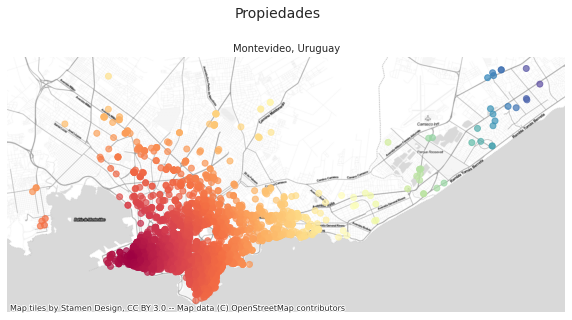

In [ ]:
cmap = sns.color_palette ("Spectral", as_cmap=True) #mapa de color
title_string = "Propiedades"
subtitle_string = "Montevideo, Uruguay"

fig, ax = plt.subplots(figsize=(10, 10))
gdf.to_crs(epsg=3857).plot(ax=ax, alpha=.7, column="distanciaC", cmap=cmap)
plt.suptitle(title_string, y=.75, fontsize=14)
plt.title(subtitle_string, fontsize=10)
cx.add_basemap(ax, crs=gdf.to_crs(epsg=3857).crs.to_string(), source=cx.providers.Stamen.TonerLite)
ax.axis('off')

*Como se observa en el mapa, hay una alta aglomeración de las propiedades en el centro de la ciudad. Alejándonos del centro, las propiedades tienden a localizarse linearlmente sobre algunos ejes principales.*

*Hagamos zoom para ver qué está pasando en la zona céntrica:*

(-6259193.2032, -6244679.7225, -4155087.7063, -4148189.2645)

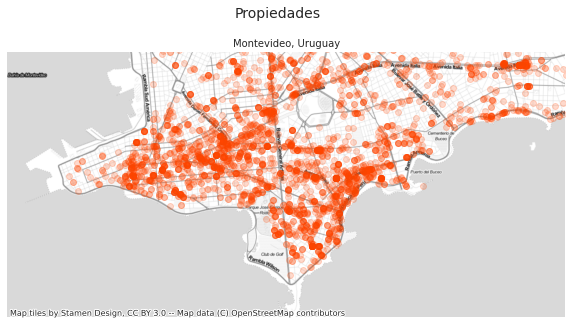

In [ ]:
title_string = "Propiedades"
subtitle_string = "Montevideo, Uruguay"

fig, ax = plt.subplots(figsize=(10, 10))
gdf.to_crs(epsg=3857).plot(ax=ax, alpha=.2, color="orangered")
plt.suptitle(title_string, y=.75, fontsize=14)
plt.title(subtitle_string, fontsize=10)
ax.set_xlim(-6259193.2032, -6244679.7225)
ax.set_ylim(-4155087.7063, -4148189.2645)
#-6259193.2032,-4155087.7063,-6244679.7225,-4148189.2645
cx.add_basemap(ax, crs=gdf.to_crs(epsg=3857).crs.to_string(), source=cx.providers.Stamen.TonerLite)
ax.axis('off')

*En el centro de Montevideo también se reconoce una tendencia a la localización de las propiedades sobre arterias principales. A pesar del atractivo de la geografía montevideana resulta llamativo que sólo el lado Este de la Ciudad pareciera registrar una importante cantidad de propiedades sobre el mar.*

Vamos a trabajar eliminar el 5% de las propiedades de mayor precio de manera de evitar problemas de outliers. 

In [ ]:
gdf=gdf.loc[gdf.price<gdf.price.quantile(.95)]

Las variables disponibles en el dataframe son las siguientes:

In [ ]:
gdf.columns

Index(['type', 'type_i18n', 'country', 'developmen', 'operation', 'operation_',
       'rooms', 'bedrooms', 'bathrooms', 'surface_to', 'surface_co', 'price',
       'currency', 'price_peri', 'title', 'lat', 'lon', 'l1', 'l2', 'l3', 'l4',
       'l5', 'l6', 'distanciaC', 'start_mont', 'start_year', 'infla',
       'adjprice', 'geometry'],
      dtype='object')

Nos interesan las siguientes:
- 'bedrooms': Numero de habitaciones
- 'surface_to': Superficie total
- 'price': Valor de alquiler en la moneda local
- 'start_mont' Mes en que se empezo a ofrecer el anuncio. Ojo que dice mont y no month.
- 'start_year': Año en el que se comenzó a ofrecer
- 'adjprice': Precio ajustado por inflacion
- 'distanciaC': Distancia al centro de negocios o *central business district* CBD. \\

Filtramos las columnas:


In [ ]:
gdf=gdf[["bedrooms", "surface_to", "price", "start_mont", "start_year", "adjprice", "distanciaC", "lat", "lon", "geometry"]]
#sobreescribimos el objeto

# Preguntas  

# Pregunta 1
Estimaremos un modelo para identificar la presencia de un gradiente urbano. Nuestra intención es verificar si existe una relación entre la distancia al centro de negocios de la ciudad y el valor de los alquileres.  

Propondremos inicialmente la estimación del siguiente modelo
$$
alquiler_i=\beta_0+\beta_1distanciaC_i+\epsilon_i
$$
Donde alquiler_i es el valor del alquiler del inmueble $i$, y $dist_i$ representa la distancia respecto al centro de negocios de la ciudad en cuestión. La distancia está computada en metros. La moneda del alquiler depende de la ciudad en cuestión (ver detalles en planilla de referencias)


**Importante:** Los que trabajen con datos de Argentina deben utilizar la variable *adjprice* en vez de *price*


1.a Estime el modelo. Interprete los coeficientes estimados. \\
1.b. Diagnostique si la variable $distancia$ tiene un efecto estadísticamente significativo en el alquiler. \\
1.c Evalue la bondad de ajuste del modelo sobre la variabilidad del alquiler \\
1.d ¿Que dicen los resultados sobre la hipotesis de efectos de la aglomeracion en el valor del alquiler?

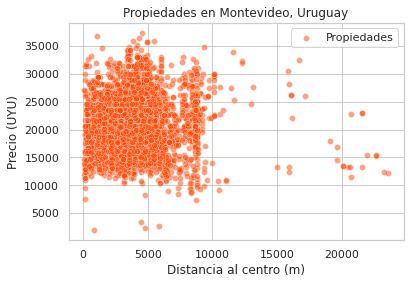

In [ ]:
sns.set_style("whitegrid")
sns.scatterplot(data=gdf, x="distanciaC", y="adjprice", color="orangered", alpha=.5, label="Propiedades").set(
    title="Propiedades en Montevideo, Uruguay", xlabel="Distancia al centro (m)", ylabel="Precio (UYU)")
plt.legend()
plt.show()

*A simple viste se obseva que existe una gran cantidad de propiedades cercanas al centro de la ciudad. Dentro de los primeros 5 km los precios presentan una alta variabilidad.* \\
*A unos 8 kms del centro vuelve a aparcer un cluster de propiedades que probablemente se trate de algún barrio/cordón de alta densidad que presenta una variada oferta de propiedades.* \\
*Los precios parecieran seguir una tendencia desdendiente en la medida que se alejan del área central. Sin embargo, si lo miramos al revez, es llamativa la caída de los precios máximos de las propiedades más céntricas: hasta 5km registran una tendencia negativa en la medida que nos acercamos al Km 0, lo que podríamos interpretarse en principio como una ruptura del gradiente de precios en las áreas centrales.*

In [ ]:
print("Instancias nulas de precios: ", sum((gdf.adjprice).isna()))
print("Instancias nulas de precios: ", sum((gdf.distanciaC).isna()))
#No existen instancias nulas en las variables que estamos tomando para el análisis. Continuamos:

Instancias nulas de precios:  0
Instancias nulas de precios:  0


In [ ]:
Y=gdf.adjprice #variable a predecir  --> precios
X=gdf.distanciaC #variable explicativa --> distancia al centro
X=sm.add_constant(X) 

In [ ]:
modelo=sm.OLS(Y,X)
resultados=modelo.fit()
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:               adjprice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9738
Date:                Wed, 01 Sep 2021   Prob (F-statistic):              0.324
Time:                        20:42:47   Log-Likelihood:                -34360.
No. Observations:                3455   AIC:                         6.872e+04
Df Residuals:                    3453   BIC:                         6.874e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.056e+04    161.125    127.582      0.0

### *Interpretación*

*1.a - De acuerdo al modelo, la recta de regresión que corta el eje Y en 20560 UYU y asciende 0.0324 UYU en la medida que nos alejamos un metro del centro. Esto quiere decir que por cada kilómetro hacia las afuera de la capital uruguaya, el precio de los alquileres sube 32.4 UYU, resultado que se contradice con la teoría de los gradientes de precio del suelo urbano.* \\

*1.b - La variable distancia no tiene efecto estadísticamente significativo de acuerdo a este primer modelo. El p-valor es de 0.324.* \\

*1.c - Con un R2 de 0.00, el modelo no logra ajustarse a los datos en absoluto. La distribución de la información no tiene una forma linear que permita un buen ajuste. * \\

*1.d - Como se mencionó anteriormente, estos primeros resultados arrojan conclusiones inversas a las que esperaríamos. Incluso teniendo en cuenta una potencial caída de los precios en el casco histórico (centro), los resultados esperados serían una disminución de los precios en la medida que nos alejamos del área central.* 


# Pregunta 2
En base a los resultados del modelo anterior: \\
a. Realice una predicción para el valor de un alquiler a 100 metros del CBD \\
b. Realice una predicción para el valor de un alquiler a 5km del CBD. \\
c. Realice un grafico cross-plot con las distancias al CBD en el eje horizontal y los precios en el eje vertical. Superponga la predicción del modelo. Ayuda: puede consultar este [notebook](https://github.com/rpasquini/metodos_cuantitativos_2021/blob/main/1_Introduccion.ipynb)

In [ ]:
ypred=resultados.predict(X) #predicción

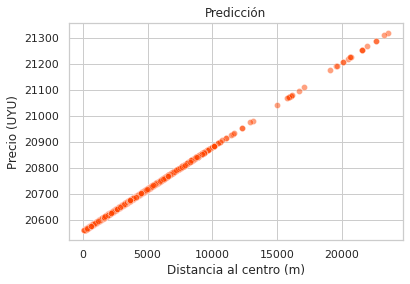

In [ ]:
sns.scatterplot(data=gdf, x="distanciaC", y=resultados.predict(X), color="orangered", alpha=.5).set(
    title="Predicción", xlabel="Distancia al centro (m)", ylabel="Precio (UYU)")
plt.show()

In [ ]:
resultados.params #parámetros del modelo

const         20556.564510
distanciaC        0.032395
dtype: float64

$\hat{Y}=\hat{\beta_0}+\hat{\beta_1}*X$

In [ ]:
#Predicción para un departamento a 100 m
predict_100=resultados.params["const"]+resultados.params["distanciaC"]*100
#Predicción para un departamento a 5 Km
predict_5000=resultados.params["const"]+resultados.params["distanciaC"]*5000

print("Un departamento a 100 metros del centro de Montevideo, de acuerdo al modelo predictivo, tendría un valor de ", round(predict_100),2, "UYU")
print("Uno a 5 Km, ", round(predict_5000),2, "UYU")

Un departamento a 100 metros del centro de Montevideo, de acuerdo al modelo predictivo, tendría un valor de  20560 2 UYU
Uno a 5 Km,  20719 2 UYU


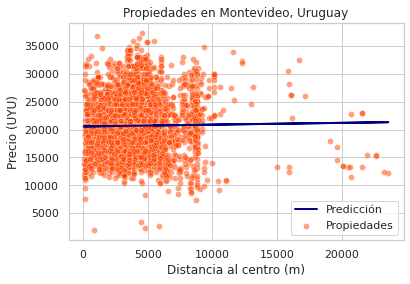

In [ ]:
sns.scatterplot(data=gdf, x="distanciaC", y="adjprice", color="orangered", alpha=.5, label="Propiedades").set(
    title="Propiedades en Montevideo, Uruguay", xlabel="Distancia al centro (m)", ylabel="Precio (UYU)")
plt.plot(gdf["distanciaC"], ypred, label="Predicción", color="navy", linewidth=2)
plt.legend()
plt.show()

*Como explicábamos previamente, la predicción tiene pendiente positiva que se interpreta como un aumento del precio de las propiedades en la medida que nos alejamos del centro.*

## Pregunta 3

Analice el cumplimiento del supuesto de errores normales. Utilice para ello alguno de los gráficos de diagnóstico sobre los mismos que  vimos en clase.
 Luego responda, explicando sus resultados: \\
a. ¿Presentan los residuos una distribución normal? \\
b. ¿Puede considerarse válido el test de hipótesis en este caso particular? Por qué si o por qué no? \\

In [ ]:
MSE=resultados.mse_resid #error cuadrático medio (al cuadrado)
RMSE=MSE**0.5 #error cuadrático medio

print("MSE: ", MSE)
print("RMSE: ", RMSE)

MSE:  25466931.83684728
RMSE:  5046.477170942843


*El error promedio de mi modelo es de UYU 5046.47.*

In [ ]:
residuos=Y-ypred
residuos.describe()

count    3.455000e+03
mean     1.378431e-11
std      5.045747e+03
min     -1.870630e+04
25%     -3.685014e+03
50%     -3.782420e+02
75%      3.238781e+03
max      1.668946e+04
dtype: float64

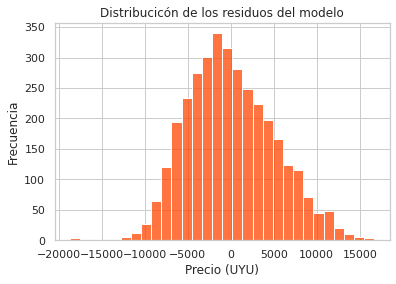

In [ ]:
sns.histplot(data=residuos, bins=30, color="orangered", alpha=.75).set(
    title="Distribucicón de los residuos del modelo", xlabel="Precio (UYU)", ylabel="Frecuencia")
plt.show()

*a. El error tiene una distribución que se asemeja a una curva normal. La mayor frecuencia está dada por errores negativos relativamente pequeños, pero también se reconoce que el mayor error es negativo. Por otro lado, la distribución positiva del error tiene más peso.*

*b. Además de que la muestra buen tamaño, puede considerarse válido porque, en general, cumple el supuesto de normalidad.*

## Pregunta 4

Reestime el modelo anterior haciendo alguna transformación en la forma funcional que ayude al cumplimiento de la normalidad de los errores. Provea una interpretación de los coeficientes obtenidos  luego de la transformación.

*Los residuos ya tienen una distribución similar a la normal.* \\

*De cualquier manera, en el intento de corregir el sesgo que detectamos, vamos a probar trabajando con el logaritmo de los datos. A partir de entonces la interpretación del coeficiente del modelo será la variación porcentual (cuánto se mueve porcentualmente el precio de las propiedades en la medida que nos alejamos del centro).*



In [ ]:
logY=np.log(Y)

In [ ]:
modelolog=sm.OLS(logY,X)
resultadoslog=modelolog.fit()
print(resultadoslog.summary())

                            OLS Regression Results                            
Dep. Variable:               adjprice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                 0.0001494
Date:                Wed, 01 Sep 2021   Prob (F-statistic):              0.990
Time:                        20:42:59   Log-Likelihood:                -205.80
No. Observations:                3455   AIC:                             415.6
Df Residuals:                    3453   BIC:                             427.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9063      0.008   1207.761      0.0

*El modelo sigue sin poder ajustarse a los datos e incluso estadísticamente es menos significativo que el anterior.* 
*Este modelo sí toma una pendiente negativa. La interpretación sería que en la medida que nos alejamos 1 Km la caída del precio es de un 0.02 %*

In [ ]:
ylogpred=resultadoslog.predict(X) #predicción
residuoslog=logY-ylogpred
residuoslog.describe()

count    3.455000e+03
mean    -4.575340e-15
std      2.568592e-01
min     -2.368727e+00
25%     -1.651736e-01
50%      1.396846e-02
75%      1.758685e-01
max      6.230185e-01
dtype: float64

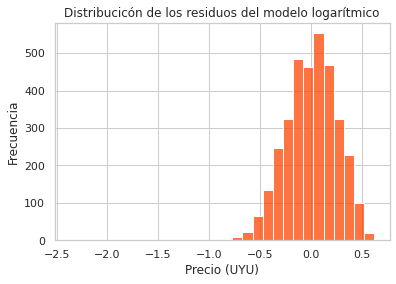

In [ ]:
sns.histplot(data=residuoslog, bins=30, color="orangered", alpha=.75).set(
    title="Distribucicón de los residuos del modelo logarítmico", xlabel="Precio (UYU)", ylabel="Frecuencia")
plt.show()

*Se observa que existe un sesgo negativo (cola a la izquierda) por la presencia de valores negativos muy bajos y poco frecuentes.* \\

*Esta transformación no mejoró en modelo, pero sí nos acercó a una pendiente negativa.* 


## Pregunta 5

Siguiendo con el objetivo de identificar el efecto de la aglomeración usando la distancia al CBD, vamos a considerar ahora la incorporación del control de la superficie del departamento como una variable de control. \\
 a. En términos téoricos: ¿Es la superficie del departamento una  variable *relevante* que no puede ser omitida? ¿Por
   qué si o por qué no? \\
 b.Incorpore la superificie del departamento al modelo. Compute el modelo y explique todos los resultados. En particular, compare los resultados del coeficiente que acompaña a distancia antes y después de la incorporación del control.

*a- Al estar analizando valores absolutos de precios, la superficie del departamento es una variable relevante para entender el efecto de la aglomeración. A misma supeficie, esperaríamos un caída en los precios de las propiedades al alejarnos del centro. Visto de otra manera, si los precios no varían la variación debería estar en la superficie de las unidades las cuales, por efectos de la aglomeración, esparíamos que fueran más pequeñas hacia el centro de la ciudad.*

*Si la variable a explicar hubiera sido el precio/m2 habría sido irrelevante y la superficie habría arrojado una alta correlación (cercana a 1) por estar incorporada previamente a la regresión.*

In [ ]:
X2=gdf[["distanciaC","surface_to"]] #genero la nueva variable explicativa, con la distancia y la superficie total
X2=sm.add_constant(X2)
modelo2=sm.OLS(Y,X2)
resultados2=modelo2.fit()
print(resultados2.summary())

                            OLS Regression Results                            
Dep. Variable:               adjprice   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     310.4
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          1.08e-124
Time:                        20:43:06   Log-Likelihood:                -34075.
No. Observations:                3455   AIC:                         6.816e+04
Df Residuals:                    3452   BIC:                         6.817e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.673e+04    213.605     78.330      0.0

*b- Vemos que, a diferencia de los modelos previos, en este caso la predicción logró ajustarse mejor a los datos (R2=0.152).*
*El efecto de la distancia al centro según este modelo es levemente superior al arrojado por el primer modelo, y sigue siendo el efecto contrario al que esperaríamos ver (área central más cara).*

*El efecto de la superficie, en cambio, es estadísticamente significativo y representa un aumento de 72 UYU cada metro cuadrado extra de la propiedad.* 


# Pregunta 6
Siguiendo con el punto anterior, ahora vamos a considerar la incorporación del control adicional de la cantidad de habitaciones del departamento. \\
a. En términos téoricos, y para los efectos de entender el efecto de la aglomeracion (distanciaCBD): ¿Es la cantidad de habitaciones una variable relevante que no puede ser omitida? ¿Por qué si o por qué no? \\
b.Incorpore la cantidad de habitaciones al modelo. Compute el modelo y explique todos los resultados. En particular, compare los resultados del coeficiente que acompaña a distancia antes y después de la incorporación del nuevo control. \\
c. Como cambio el coeficiente de la variable superficie al incorporar la cantidad de habitaciones al modelo? Como se explica este cambio?

*a- La cantidad de habitaciones no es una variable relevante. Podría ser omitida al incorporar la superficie, la cual logra incluirla implícitamente si tenemos en cuenta que los m2 de las propiedades urbanas están estrechamente correlacionados con la cantidad de habitaciones que estas incorporan (en el contexto de un mercado inmobiliario standard).* 

*Sí tendría efecto y podría ser incorporada si se tratara de un mercado más flexible, donde la correlación entre la superficie de la propiedad y la cantidad de habitaciones ya no vaya estrechamente de la mano.* 

*Antes de continuar, veamos en qué grado están correlacionadas cada una de las variables:*

In [ ]:
corr=gdf.corr(method ='pearson')
corr

,bedrooms,surface_to,price,start_mont,start_year,adjprice,distanciaC,lat,lon
bedrooms,1.000000,0.253508,0.392676,0.006536,0.038383,0.366536,-0.084302,0.064667,-0.100861
surface_to,0.253508,1.000000,0.397549,0.008882,-0.047108,0.390009,-0.002967,0.033802,-0.013918
price,0.392676,0.397549,1.000000,-0.024929,0.036168,0.975211,0.009788,-0.254124,0.093261
start_mont,0.006536,0.008882,-0.024929,1.000000,-0.540631,0.074287,0.004492,0.002691,-0.005295
start_year,0.038383,-0.047108,0.036168,-0.540631,1.000000,-0.039725,-0.008392,-0.012536,-0.000452
adjprice,0.366536,0.390009,0.975211,0.074287,-0.039725,1.000000,0.016791,-0.246118,0.096801
distanciaC,-0.084302,-0.002967,0.009788,0.004492,-0.008392,0.016791,1.000000,0.524647,0.916778
lat,0.064667,0.033802,-0.254124,0.002691,-0.012536,-0.246118,0.524647,1.000000,0.247379
lon,-0.100861,-0.013918,0.093261,-0.005295,-0.000452,0.096801,0.916778,0.247379,1.000000


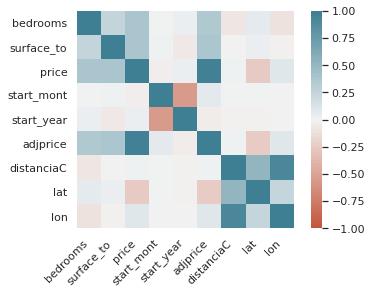

In [ ]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

*Como era de esperar, el precio está correlacionado con la superficie y la cantidad de habitaciones. Pero también se reconoce un efecto de correlación entre las habitaciones y la superficie.*

*Continuando con el análisis, incluiremos a las habitaciones entre las variables explicativamos para ver qué efecto tiene el parámetro.*

In [ ]:
print("Hay ", gdf.bedrooms.isna().sum(), "valores nulos que debemos eliminar para estimar este modelo muldivariado")
print("Representa un ", round((gdf.bedrooms.isna().sum())/(len(gdf))*100),2, "% de los datos")

Hay  2140 valores nulos que debemos eliminar para estimar este modelo muldivariado
Representa un  62 2 % de los datos


In [ ]:
datos=gdf[["distanciaC", "surface_to","bedrooms", "adjprice"]] 
datos=datos.dropna() #para mantener el mismo tamaño de vectores explicativos y a explicar, limpio todos los datos nulos juntos

Y3=datos[["adjprice"]]
X3=datos[["distanciaC","surface_to", "bedrooms"]] #genero la nueva variable explicativa, con la distancia, la superficie total y la cantidad de habitaciones
X3=sm.add_constant(X3)
modelo3=sm.OLS(Y3,X3)
resultados3=modelo3.fit()
print(resultados3.summary())
print(X3.isna().sum())

                            OLS Regression Results                            
Dep. Variable:               adjprice   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     75.26
Date:                Wed, 01 Sep 2021   Prob (F-statistic):           6.47e-45
Time:                        20:43:14   Log-Likelihood:                -12749.
No. Observations:                1315   AIC:                         2.551e+04
Df Residuals:                    1311   BIC:                         2.553e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.855e+04    339.365     54.668      0.0

*La incorporación de la cantidad de habitaciones logró aminorar tanto el efecto de la distancia al centro (el cual además es menos representativo ahora) como el de la superficie. Con una gran caída de 72.5 a 13.7 UYU por m2 extra, la cantidad de habitaciones logra incorporar parte del efecto que tiene el precio de la superficie dentro de su parámetro.* 

*La interpretación es que en la medida que agregamos una unidad extra, la propiedad aumenta unos 2086 UYU.*

*El grado de ajuste del modelo es levemente menor al anterior.*

# Pregunta 7
Las variables **start_year** y **start_mont** presentan la informacion del año y mes en el que el anuncio se publico respectivamente. \\
a. Genere una variable dummy para identificar las observaciones posteriores al advenimiento del covid en marzo 2020 (i.e., 1 si es posterior a marzo 2020 y 0 de otro modo) \\
b. Ingrese la variable dummy al modelo con el que viene trabajando. Interprete el coeficiente.

In [ ]:
gdf["dummiesCovid"]=0
#creo una columna de ceros para los asignar los valores dummies (1 a aquellas propiedades publicadas post-Covid)

gdf.loc[(gdf["start_year"] == 2021) | ((gdf["start_year"] == 2020) & (gdf["start_mont"]>3)), "dummiesCovid"] = 1 
# le asigno varlor 1 a la columna que cree, sólo si el aviso fue publicado en 2021 o si fue publicado en 2020 luego del mes 3

gdf.head()

,bedrooms,surface_to,price,start_mont,start_year,adjprice,distanciaC,lat,lon,geometry,dummiesCovid
0,2.0,45,18500,7,2020,17364.772727,2471.263236,-34.903810,-56.172973,POINT (102449.819 100324.855),1
1,2.0,60,19000,7,2020,17834.090909,2204.092173,-34.904786,-56.175778,POINT (102193.417 100216.661),1
2,NaN,50,15000,7,2020,14079.545455,6933.488954,-34.891904,-56.126089,POINT (106735.864 101643.595),1
3,NaN,40,11000,7,2020,10325.000000,8791.813906,-34.877834,-56.110225,POINT (108187.471 103203.328),1
4,1.0,50,24000,7,2020,22527.272727,3737.987687,-34.915011,-56.160126,POINT (103623.471 99081.844),1


In [ ]:
print("El ", round(sum(gdf.dummiesCovid==1)/len(gdf)*100),2, "% de las observaciones fueron posteriores al covid")

El  56 2 % de las observaciones fueron posteriores al covid


*Veamos si a primera vista reconocemos algún patrón relacionado al Covid en nuestro gráfico de dispersión:*

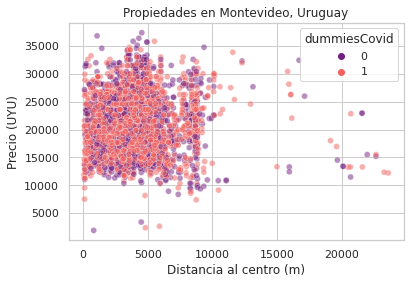

In [ ]:
sns.scatterplot(data=gdf, x="distanciaC", y="adjprice", hue="dummiesCovid", palette="magma", alpha=.5).set(
    title="Propiedades en Montevideo, Uruguay", xlabel="Distancia al centro (m)", ylabel="Precio (UYU)")
plt.show()

*En principio no se reconoce ningún patrón que permita diferenciar con claridad las propiedades publicadas post Covid, pero procedamos a ver qué arroja el modelo:*

*Planteamos el modelo:*

In [ ]:
datos=gdf[["distanciaC", "surface_to", "bedrooms", "adjprice", "dummiesCovid"]] 
datos=datos.dropna()

Y4=datos[["adjprice"]]
X4=datos[["distanciaC","surface_to", "bedrooms", "dummiesCovid"]]
X4=sm.add_constant(X4)
modelo4=sm.OLS(Y4,X4)
resultados4=modelo4.fit()
print(resultados4.summary())

                            OLS Regression Results                            
Dep. Variable:               adjprice   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     56.82
Date:                Wed, 01 Sep 2021   Prob (F-statistic):           3.01e-44
Time:                        20:43:27   Log-Likelihood:                -12749.
No. Observations:                1315   AIC:                         2.551e+04
Df Residuals:                    1310   BIC:                         2.553e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.821e+04    444.000     41.013   

*El efecto que reconocemos, de acuerdo a este modelo, nuevamente es el contrario al que esperaríamos ver: las propiedades publicadas luego de brote de la pandemia suman un valor de 397.47 UYU con respecto a las prepandémicas. De cualquier manera, no podemos decir que el modelo es estadísticamente significativo.*

*Por otro lado, la distancia al centro continúa con un efecto muy bajo, apenas superior al registrado en el modelo anterior. En lo que refiere a la superficie y cantidad de habitaciones (correlacionadas entre sí), también sufrieron un muy leve aumento en sus parámetros, casi despreciable.*

*El modelo se ajusta levemente mejor a los datos que el último, pero no supera al anteúltimo.*

# Pregunta 8

En esta punto vamos a indagar la hipótesis de que el COVID afectó el gradiente urbano de alquileres. Vamos a estimar el siguiente modelo:

$$
alquiler_i=\beta_0+\beta_1distanciaC_i+\beta_2(distanciaC_i * Post_t)+\epsilon_i
$$

donde $Post_t$ es una variable dummy que identifica si la oferta fue realizada posterior a marzo 2020 y 0 de otro modo (calculada en el punto anterior).
Note que la variable que acompaña a $\beta_2$ en la ecuacion ($distanciaC_i * Post_t$)  es la multiplicación entre la distancia al CBD y la variable dummy $Post_t$. **Esta es una variable que usted debera generar por separado.** \\
a. Estime el modelo. Interprete los coeficientes obtenidos. \\
b. Es $\beta_2$ estadisticamente significativo? Como se interpreta este resultado? \\
c. (Opcional) Realice un grafico de las predicciones del modelo contra la variable distancia, de manera similar al punto 2.c
d. ¿Cuáles son sus conclusiones en relacion al efecto del Covid sobre el gradiente de alquileres?


In [ ]:
gdf["distpost"]=gdf.dummiesCovid*gdf.distanciaC

In [ ]:
Y5=gdf[["adjprice"]]
X5=gdf[["distanciaC","distpost"]]
X5=sm.add_constant(X5)
modelo5=sm.OLS(Y5,X5)
resultados5=modelo5.fit()
print(resultados5.summary())

                            OLS Regression Results                            
Dep. Variable:               adjprice   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.112
Date:                Wed, 01 Sep 2021   Prob (F-statistic):              0.329
Time:                        20:43:32   Log-Likelihood:                -34360.
No. Observations:                3455   AIC:                         6.873e+04
Df Residuals:                    3452   BIC:                         6.874e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.056e+04    161.122    127.591      0.0

*Sin bien ninguno de los dos son estadísticamente significativos, el efecto de la distancia post-Covid, según este modelo, es casi el cuádruple que el efecto de la distancia en sí.*
*Alejarse 1 Km del centro, implica un aumento de 10.2 UYU; pero, luego del Covid, hay que sumarle además otros 39.4 UYU por Km extra.*

*El ajuste del modelo bajó considerablemente.*

*Vamos a definir una función que explique el precio según la distancia, de acuerdo a este último modelo:*

In [ ]:
def prediccion_alquiler (distancia):
   "Predice el precio de alquiler de una propiedad antes del Covid"
   x=resultados5.params["const"] + resultados5.params["distanciaC"]*distancia
   return x

def prediccion_alquiler_covid (distancia):
   "Predice el precio de alquiler de una propiedad luego del Covid"
   x=resultados5.params["const"] + resultados5.params["distanciaC"]*distancia + resultados5.params["distpost"]*distancia*1
   return x

In [ ]:
#veamos qué pasa en el medio de los quintiles:

data = [[10, gdf.distanciaC.quantile(.1)],
        [30, gdf.distanciaC.quantile(.3)],
        [50, gdf.distanciaC.quantile(.5)],
        [70, gdf.distanciaC.quantile(.7)],
        [90, gdf.distanciaC.quantile(.9)]]

prediccion_Covid = pd.DataFrame(data, columns = ["Percentil", "Distancia"])
prediccion_Covid["Prediccion pre-Covid"]=prediccion_alquiler(prediccion_Covid.Distancia)
prediccion_Covid["Prediccion post-Covid"]=prediccion_alquiler_covid(prediccion_Covid.Distancia)
prediccion_Covid["Variacion porcentual"]=prediccion_Covid["Prediccion post-Covid"]/prediccion_Covid["Prediccion pre-Covid"]*100

prediccion_Covid

,Percentil,Distancia,Prediccion pre-Covid,Prediccion post-Covid,Variacion porcentual
0,10,1191.788670,20569.951826,20616.892311,100.228199
1,30,2770.268830,20586.052385,20695.163811,100.530026
2,50,3984.558923,20598.438191,20755.376355,100.761894
3,70,4892.829836,20607.702589,20800.414442,100.935145
4,90,7675.873678,20636.089743,20938.416186,101.465037


*De acuerdo a este modelo la variación porcentual del precio que implicó el efecto del Covid toma mayor peso en tanto nos alejamos del centro.*

*En otras palabras, el precio de una propiedad ubicada en el percentil 90 de la distancia al centro (muy alejada) subió relativamente más que una ubicada en la zona central.*

#Pregunta 9 (opcional)
Realice una hipótesis adicional relacionada al efecto de la pandemia que pueda testear en base a los datos provistos. Especifique el modelo y testee su hipótesis.

*Con este modelo vamos a intentar captar el efecto diferenciado de la distancia, y ver si efectivamente se mantiene de manera lineal o registra quiebres.* 

*Hipótesis: el impacto del Covid afectó de manera diferencial según la distancia al centro. El efecto en las propiedades muy céntricas o muy lejanas es menor que aquellas que se ubican a una distancia media.*

*Para corroborar esta hipótesos vamos a trabajar con los quintiles de distancia al centro:*

$$
alquiler_i=\beta_0+\beta_1distanciaC_i+\beta_2(Quintil_n * Post_t)+\epsilon_i
$$

In [ ]:
#Creamos columnas y variables dummies para cada uno de los quintiles (distanciaC) y asignarle variables dummies

gdf["q1"]=0
gdf["q2"]=0
gdf["q3"]=0
gdf["q4"]=0
gdf["q5"]=0

gdf.loc[(gdf["distanciaC"] < gdf.distanciaC.quantile(.2)), "q1"] = 1 
gdf.loc[(gdf["distanciaC"] >= gdf.distanciaC.quantile(.2)) & (gdf["distanciaC"] < gdf.distanciaC.quantile(.4)), "q2"] = 1 
gdf.loc[(gdf["distanciaC"] >= gdf.distanciaC.quantile(.4)) & (gdf["distanciaC"] < gdf.distanciaC.quantile(.6)), "q3"] = 1 
gdf.loc[(gdf["distanciaC"] >= gdf.distanciaC.quantile(.6)) & (gdf["distanciaC"] < gdf.distanciaC.quantile(.8)), "q4"] = 1 
gdf.loc[(gdf["distanciaC"] >= gdf.distanciaC.quantile(.8)), "q5"] = 1 

gdf

,bedrooms,surface_to,price,start_mont,start_year,adjprice,distanciaC,lat,lon,geometry,dummiesCovid,distpost,q1,q2,q3,q4,q5
0,2.0,45,18500,7,2020,17364.772727,2471.263236,-34.903810,-56.172973,POINT (102449.819 100324.855),1,2471.263236,0,1,0,0,0
1,2.0,60,19000,7,2020,17834.090909,2204.092173,-34.904786,-56.175778,POINT (102193.417 100216.661),1,2204.092173,0,1,0,0,0
2,NaN,50,15000,7,2020,14079.545455,6933.488954,-34.891904,-56.126089,POINT (106735.864 101643.595),1,6933.488954,0,0,0,0,1
3,NaN,40,11000,7,2020,10325.000000,8791.813906,-34.877834,-56.110225,POINT (108187.471 103203.328),1,8791.813906,0,0,0,0,1
4,1.0,50,24000,7,2020,22527.272727,3737.987687,-34.915011,-56.160126,POINT (103623.471 99081.844),1,3737.987687,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3631,1.0,54,25000,6,2020,26818.181818,10093.860008,-34.893471,-56.090524,POINT (109986.731 101466.703),1,10093.860008,0,0,0,0,1
3632,2.0,85,18500,6,2020,19845.454545,4509.165954,-34.866643,-56.191714,POINT (100737.231 104448.491),1,4509.165954,0,0,0,1,0
3633,1.0,40,25000,6,2020,26818.181818,5346.202673,-34.905546,-56.141299,POINT (105344.596 100131.062),1,5346.202673,0,0,0,1,0
3634,1.0,84,32000,6,2020,34327.272727,3644.206621,-34.907130,-56.159906,POINT (103643.942 99956.110),1,3644.206621,0,0,1,0,0


In [ ]:
#Multiplicamos el valor de la distancia por la dummy del quintil

gdf["q1"]=gdf.distpost*gdf.q1
gdf["q2"]=gdf.distpost*gdf.q2
gdf["q3"]=gdf.distpost*gdf.q3
gdf["q4"]=gdf.distpost*gdf.q4
gdf["q5"]=gdf.distpost*gdf.q5

*Tenemos los datos ordenados de la siguiente manera:*

In [ ]:
gdf

,bedrooms,surface_to,price,start_mont,start_year,adjprice,distanciaC,lat,lon,geometry,dummiesCovid,distpost,q1,q2,q3,q4,q5
0,2.0,45,18500,7,2020,17364.772727,2471.263236,-34.903810,-56.172973,POINT (102449.819 100324.855),1,2471.263236,0.0,2471.263236,0.000000,0.000000,0.000000
1,2.0,60,19000,7,2020,17834.090909,2204.092173,-34.904786,-56.175778,POINT (102193.417 100216.661),1,2204.092173,0.0,2204.092173,0.000000,0.000000,0.000000
2,NaN,50,15000,7,2020,14079.545455,6933.488954,-34.891904,-56.126089,POINT (106735.864 101643.595),1,6933.488954,0.0,0.000000,0.000000,0.000000,6933.488954
3,NaN,40,11000,7,2020,10325.000000,8791.813906,-34.877834,-56.110225,POINT (108187.471 103203.328),1,8791.813906,0.0,0.000000,0.000000,0.000000,8791.813906
4,1.0,50,24000,7,2020,22527.272727,3737.987687,-34.915011,-56.160126,POINT (103623.471 99081.844),1,3737.987687,0.0,0.000000,3737.987687,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3631,1.0,54,25000,6,2020,26818.181818,10093.860008,-34.893471,-56.090524,POINT (109986.731 101466.703),1,10093.860008,0.0,0.000000,0.000000,0.000000,10093.860008
3632,2.0,85,18500,6,2020,19845.454545,4509.165954,-34.866643,-56.191714,POINT (100737.231 104448.491),1,4509.165954,0.0,0.000000,0.000000,4509.165954,0.000000
3633,1.0,40,25000,6,2020,26818.181818,5346.202673,-34.905546,-56.141299,POINT (105344.596 100131.062),1,5346.202673,0.0,0.000000,0.000000,5346.202673,0.000000
3634,1.0,84,32000,6,2020,34327.272727,3644.206621,-34.907130,-56.159906,POINT (103643.942 99956.110),1,3644.206621,0.0,0.000000,3644.206621,0.000000,0.000000


*Así, para el parámetro beta 2, sólo se activará el quintil correspondiente según la distancia donde se encuentre la vivienda.*

*Antes de proceder al modelo, veamos cómo se distribuyen las propiedades:*

In [ ]:
gdf.loc[(gdf["q1"] != 0, "quintil")] = "q1"
gdf.loc[(gdf["q2"] != 0, "quintil")] = "q2" 
gdf.loc[(gdf["q3"] != 0, "quintil")] = "q3" 
gdf.loc[(gdf["q4"] != 0, "quintil")] = "q4" 
gdf.loc[(gdf["q5"] != 0, "quintil")] = "q5" 

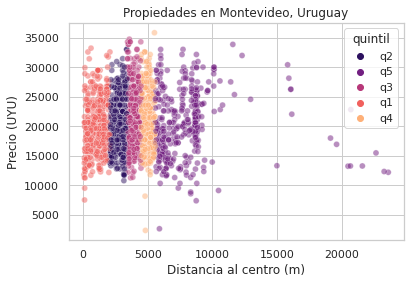

In [ ]:
sns.scatterplot(data=gdf, x="distanciaC", y="adjprice", hue="quintil", palette="magma", alpha=.5).set(
    title="Propiedades en Montevideo, Uruguay", xlabel="Distancia al centro (m)", ylabel="Precio (UYU)")
plt.show()

*Ahora sí vamos a averiguar si existe algún impacto diferencial por quintil:*

In [ ]:
Y6=gdf[["adjprice"]]
X6=gdf[["distanciaC","q1", "q2", "q3", "q4", "q5"]]
X6=sm.add_constant(X6)
modelo6=sm.OLS(Y6,X6)
resultados6=modelo6.fit()
print(resultados6.summary())

                            OLS Regression Results                            
Dep. Variable:               adjprice   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.271
Date:                Wed, 01 Sep 2021   Prob (F-statistic):            0.00329
Time:                        20:53:20   Log-Likelihood:                -34351.
No. Observations:                3455   AIC:                         6.872e+04
Df Residuals:                    3448   BIC:                         6.876e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.038e+04    211.467     96.356      0.0

*Esto significa que parto de un promedio de 20380 UYU. A partir de ahí, el efecto de la distancia en general es el aumento de sólo 41.7 UYU por km.*  

*El efecto de la pandemia sobre la curva de precio es diferente a lo largo de la ciudad, incorporando los grupos de quintiles:*

*   *El quintil uno tiene un efecto positivo de aumento de 149.4 UYU por Km extra más lejos del centro con respecto a todos los otros grupos*

*   *El quintil dos, en cambio, registra una caída de 93.9 UYU cada Km que nos alejamos respecto al conjunto tal.* 

*   *El quintil tres, es el que mayor valor agregó luego de la pandemia: 230.5 el Km extra*

*   *El cuarto nuevamente registra un efecto positivo en el precio con respecto a la distancia, de 135.2 UYU el km más alejado*

*   *Por último, el quinto registra un descenso del precio por estar más alejado del centro del 218. UYU* 
  

In [ ]:
data = [[10, gdf.distanciaC.quantile(.1)],
        [30, gdf.distanciaC.quantile(.3)],
        [50, gdf.distanciaC.quantile(.5)],
        [70, gdf.distanciaC.quantile(.7)],
        [90, gdf.distanciaC.quantile(.9)]]

prediccion_Covid = pd.DataFrame(data, columns = ["Percentil", "Distancia"])
prediccion_Covid.loc[(prediccion_Covid["Percentil"] == 10, "Prediccion post-Covid por quintiles")] = (resultados6.params["const"] + resultados6.params["distanciaC"]*prediccion_Covid.Distancia + resultados6.params["q1"]*prediccion_Covid.Distancia)
prediccion_Covid.loc[(prediccion_Covid["Percentil"] == 30, "Prediccion post-Covid por quintiles")] = (resultados6.params["const"] + resultados6.params["distanciaC"]*prediccion_Covid.Distancia + resultados6.params["q2"]*prediccion_Covid.Distancia)
prediccion_Covid.loc[(prediccion_Covid["Percentil"] == 50, "Prediccion post-Covid por quintiles")] = (resultados6.params["const"] + resultados6.params["distanciaC"]*prediccion_Covid.Distancia + resultados6.params["q3"]*prediccion_Covid.Distancia)
prediccion_Covid.loc[(prediccion_Covid["Percentil"] == 70, "Prediccion post-Covid por quintiles")] = (resultados6.params["const"] + resultados6.params["distanciaC"]*prediccion_Covid.Distancia + resultados6.params["q4"]*prediccion_Covid.Distancia)
prediccion_Covid.loc[(prediccion_Covid["Percentil"] == 90, "Prediccion post-Covid por quintiles")] = (resultados6.params["const"] + resultados6.params["distanciaC"]*prediccion_Covid.Distancia + resultados6.params["q5"]*prediccion_Covid.Distancia)

prediccion_Covid

,Percentil,Distancia,Prediccion post-Covid por quintiles
0,10,1191.788670,20603.929542
1,30,2770.268830,20231.565958
2,50,3984.558923,21460.629376
3,70,4892.829836,21241.339215
4,90,7675.873678,20528.711077


*La predicción de precios toma signos positivos y negativos a lo largo de la Ciudad. El q2 presenta la primer caída, luego se registra un llamativo aumento en los grupos q3 y q4 y una importante caída hacia el borde de la ciudad.*

*Esta predicción de precios, si bien no es estadísticamente significativa para todos los grupos ni logra un buen ajuste a los datos, permite captar los quiebres en el gradiente de precios.*

### *Los grupos de precios y su distribución en el territorio montevideano:*

In [ ]:
gdf = gpd.GeoDataFrame(gdf, crs="EPSG:3857")
#lo volvemos a convertir en geodataframe

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries. CRS mismatch will raise an error in the future versions of GeoPandas.
  """Entry point for launching an IPython kernel.


(-6263757.840344557,
 -6228046.937416479,
 -4154747.563218868,
 -4138300.175007794)

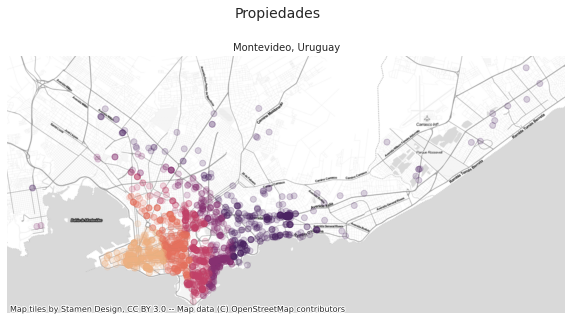

In [ ]:
cmap = sns.color_palette ("flare", as_cmap=True) #mapa de color
title_string = "Propiedades"
subtitle_string = "Montevideo, Uruguay"

fig, ax = plt.subplots(figsize=(10, 10))
gdf.to_crs(epsg=3857).plot(ax=ax, alpha=.2, column="quintil", cmap=cmap)
plt.suptitle(title_string, y=.75, fontsize=14)
plt.title(subtitle_string, fontsize=10)
cx.add_basemap(ax, crs=gdf.to_crs(epsg=3857).crs.to_string(), source=cx.providers.Stamen.TonerLite)
ax.axis('off')

***Conclusión***

*Los modelos lineales para predecir el precio en función a la distancia en la ciudad de Montevideo no han logrado una buena performance. Esto podría tener que ver con la poca linealidad en el comportamiento de los datos.*

*Es pobable que, con una condición geográfica tan particular como la de la capital uruguaya, el gradiente de precios responda también a otras variables, como puede serlo la linealidad sobre la costa; o que registre valores en ciertas áreas que altener la ecuación general.*

*Hemos sido capaces de detectar que el comportamiento general marca una caída hacia los extremos, tanto céntrico como periurbano.*